<a href="https://colab.research.google.com/github/danieljaouen/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module3-dimensionality-reduction/High%20Dimensional%20Data%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

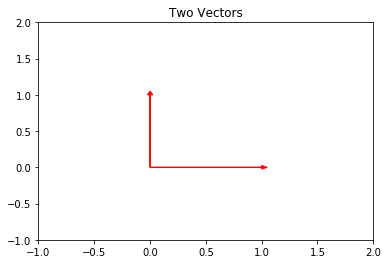

In [2]:
import matplotlib.pyplot as plt

vec1 = [1, 0]
vec2 = [0, 1]
plt.arrow(0,0, vec1[0], vec1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vec2[0], vec2[1],head_width=.05, head_length=0.05, color ='red')
plt.xlim(-1,2)          
plt.ylim(-1,2)
plt.title("Two Vectors")
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

A function is a relation f: x --> y, where x spans the domain.  Therefore, there can only be one y for every x.

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

In [0]:
# Relation 2 is the only function

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

In [0]:
# dimension of domain == 3
# dimension of the range == 2

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

In [0]:
# Yes, f(x) = [x, 0]

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

In [0]:
import numpy as np

# p([1, 0]) = [1, 0], p([0, 1] = 3, 2)
A = np.array([
  [1, 3],
  [3, 2]
])

# p([1, 0, 0]) = [4, -1, 5]
# p([0, 1, 0]) = [1, 2, 1]
# p([0, 0, 1]) = [2, 3, -2]
B = np.array([
  [4, 1, 2],
  [-1, 2, 3],
  [5, 1, -2]
])

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [5]:
x = np.array([1, 1, 1])
np.matmul(B, x)

array([7, 4, 4])

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

An eigenvector, v, is a vector of n dimensions (where A is nxn) whose product, when multiplied by A, yields a result of lambda * v.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

Overfitting can be an issue when working with high dimensional data.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

You should have at least 5n observations, where n is the number of features.

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [11]:
import pandas as pd

df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
df_X = df[columns]

df_X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
from sklearn.decomposition import PCA
pca = PCA(4)
pca.fit(df_X)
B = pca.transform(df_X)
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)
print(B[:5])



 Eigenvectors: 
 [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]
 [-0.58099728  0.59641809  0.07252408  0.54906091]
 [ 0.31725455 -0.32409435 -0.47971899  0.75112056]]

 Eigenvalues: 
 [4.22484077 0.24224357 0.07852391 0.02368303]
[[-2.68420713e+00  3.26607315e-01 -2.15118370e-02  1.00615724e-03]
 [-2.71539062e+00 -1.69556848e-01 -2.03521425e-01  9.96024240e-02]
 [-2.88981954e+00 -1.37345610e-01  2.47092410e-02  1.93045428e-02]
 [-2.74643720e+00 -3.11124316e-01  3.76719753e-02 -7.59552741e-02]
 [-2.72859298e+00  3.33924564e-01  9.62296998e-02 -6.31287327e-02]]


,sepal_length,sepal_width,petal_length,petal_width
0,-2.684207,0.326607,-0.021512,0.001006
1,-2.715391,-0.169557,-0.203521,0.099602
2,-2.889820,-0.137346,0.024709,0.019305
3,-2.746437,-0.311124,0.037672,-0.075955
4,-2.728593,0.333925,0.096230,-0.063129


# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)